In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.linear_model import LassoCV, Lasso
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

In [2]:
train_ori = pd.read_csv('train.csv')
test_ori = pd.read_csv('test.csv')
y_ori = train_ori['price']
y = np.log(y_ori) #4000 entries

#combine train and test data to do feature engineering for predictors
train = pd.concat([train_ori.drop('price',axis=1),test_ori],axis=0,ignore_index=True) #6000 entries

# Feature engineering

## Amenities

In [3]:
train['amenities_clean'] = np.nan
train['amenities_clean'] = train['amenities_clean'].astype('object')

for i in tqdm(range(len(train['amenities']))):
    train.at[i,'amenities_clean'] = train.loc[i,'amenities'][2:-2].split('", "')
    
for i in tqdm(range(len(train['amenities_clean']))):
    for j in range(len(train.loc[i,'amenities_clean'])):
        if 'Fast wifi \\u2013' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Fast Wifi'
        if 'Wifi \\u2013' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Wifi'
        if 'HDTV' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'HD Television'
        if 'TV' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'TV'
        if 'body soap' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Body soap'
        if 'shampoo' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Shampoo'
        if 'refrigerator' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Refrigerator'
        if 'fridge' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Refrigerator'
        if 'conditioner' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Conditioner'
        if 'stove' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Stove'
        if 'oven' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Oven'
        if 'sound system' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Sound system'
        if 'Sound system' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Sound system'
        if 'Clothing storage' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Clothing storage'
        if 'Children\\u2019s books and toys' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Children\\u2019s books and toys'
        if 'Shared hot tub' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Hot tub'
        if 'Private hot tub' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private hot tub'
        if 'Shared pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Pool'
        if 'Shared indoor pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Pool'
        if 'Shared outdoor pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Pool'
        if 'Private pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private pool'
        if 'Private indoor pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private pool'
        if 'Private outdoor pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private pool'
        if 'Free washer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Washer'
        if 'Paid washer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Washer'
        if 'Washer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Washer'
        if 'Dryer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Dryer'
        if 'Free dryer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Dryer'
        if 'Paid dryer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Dryer'
        if 'on premises' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Parking on premises'
        if 'off premises' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Parking off premises'
        if 'Free street parking' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Parking off premises'
        if 'conditioning' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Air conditioning'
        if 'Game console' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Game console'
        if 'Gym' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Gym'
        if 'gym' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Gym'
        if 'coffee' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Coffee maker'
        if 'sauna' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Sauna'
        if 'high chair' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'High chair'
        if 'High chair' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'High chair'
        if 'crib' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Crib'
        if 'Crib' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Crib'
        if 'Fenced garden or backyard' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private garden or backyard'
        if 'Private fenced garden or backyard' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private garden or backyard'
        if 'Shared fenced garden or backyard' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Shared garden or backyard'
        if 'Private fenced garden or backyard' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private garden or backyard'

100%|███████████████████████████████████████| 6000/6000 [01:27<00:00, 68.67it/s]


In [4]:
amen_list = train['amenities_clean'].to_list()
vectorizer = CountVectorizer(analyzer=lambda x: x)
bow = vectorizer.fit_transform(amen_list)
bow_df = pd.DataFrame(bow.todense(), columns = vectorizer.get_feature_names())

/opt/anaconda3/envs/Newpython/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## room_tyoe, instant bookable, property type, minimum night

In [5]:
## room_type
room_type_dummy=np.select(
    condlist=[ 
        train['room_type'].str.contains('Private', case=False),
        train['room_type'].str.contains('entire', case=False),
        train['room_type'].str.contains('shared', case=False),
        ],
    choicelist=['Private', 'entire', 'shared'],
    default='Hotel'
)
room_type_dummy = pd.DataFrame(room_type_dummy,columns=['room_type_dummy'])
room_type_dummy=pd.get_dummies(room_type_dummy)
## Instant bookable
instant_bookable_dummy=pd.get_dummies(train['instant_bookable'],drop_first = True)
instant_bookable_dummy.columns=['instant_bookable_dummy']
## property type
la=train['property_type']
property_type_dummy = np.select(
    condlist=[
        la.str.contains('Private', case=False),
        la.str.contains('entire', case=False),
        ],
    choicelist=['Private', 'entire'],
    default='others'
)

property_type_dummy = pd.DataFrame(property_type_dummy,columns=['property_type_dummy'])
property_type_dummy=pd.get_dummies(property_type_dummy)
# Minimum night
minimum_night=train['minimum_nights']

minimum_night.values[minimum_night < 28] = 0
minimum_night.values[minimum_night >= 28] = 1

## house_response_time, house_response_rate, house_acceptance_rate, host_is_superhost, host_identity_verified, host_verifications

In [6]:
train["host_response_time"] = train["host_response_time"].fillna('NA')
host_response_time_dummy = np.select(
    condlist=[ 
       train['host_response_time'].str.contains('within an hour', case=False),
        train['host_response_time'].str.contains('within a few hours', case=False),
        train['host_response_time'].str.contains('within a day', case=False),
        train['host_response_time'].str.contains('a few days or more', case=False),
        ],
    choicelist=['within an hour', 'within a few hours', 'within a day','a few days or more'],
    default='others'
)
host_response_time_dummy = pd.DataFrame(host_response_time_dummy,columns=['host_response_time_dummy'])
host_response_time_dummy = pd.get_dummies(host_response_time_dummy)

train["host_response_rate"] = train["host_response_rate"].astype('str')
train["host_response_rate"] = train["host_response_rate"].str.replace("%","")
train["host_response_rate"] = train["host_response_rate"].astype('float')
def hostrrate(rrate):
    if rrate > 75:
        return 'rrate over 75'
    elif rrate > 50:
        return 'rrate over 50'
    else:
        return 'rrate under 50'
train["host_response_rate"] = train["host_response_rate"].apply(hostrrate)
host_response_rate_dummy = np.select(
    condlist=[ 
       train['host_response_rate'].str.contains('rrate over 50', case=False),
        train['host_response_rate'].str.contains('rrate over 75', case=False),
        ],
    choicelist=['rrate over 50', 'rrate over 75',],
    default='rrate under 50'
)
host_response_rate_dummy = pd.DataFrame(host_response_rate_dummy,columns=['host_response_rate_dummy'])
host_response_rate_dummy = pd.get_dummies(host_response_rate_dummy)

train["host_acceptance_rate"] = train["host_acceptance_rate"].astype('str')
train["host_acceptance_rate"] = train["host_acceptance_rate"].str.replace("%","")
train["host_acceptance_rate"] = train["host_acceptance_rate"].astype('float')
def hostarate(arate):
    if arate > 75:
        return 'arate over 75'
    elif arate > 50:
        return 'arate over 50'
    else:
        return 'arate under 50'
train["host_acceptance_rate"] = train["host_acceptance_rate"].apply(hostarate)
host_acceptance_rate_dummy = np.select(
    condlist=[ 
       train['host_acceptance_rate'].str.contains('rrate over 50', case=False),
        train['host_acceptance_rate'].str.contains('rrate over 75', case=False),
        ],
    choicelist=['rrate over 50', 'rrate over 75',],
    default='rrate under 50'
)
host_acceptance_rate_dummy = pd.DataFrame(host_acceptance_rate_dummy,columns=['host_acceptance_rate_dummy'])
host_acceptance_rate_dummy = pd.get_dummies(host_acceptance_rate_dummy)
host_is_superhost_dummy=pd.get_dummies(train['host_is_superhost'],drop_first = True)
host_is_superhost_dummy.columns=['host_is_superhost']

host_identity_verified_dummy=pd.get_dummies(train['host_identity_verified'],drop_first = True)
host_identity_verified_dummy.columns=['host_identity_verified']

train.loc[train["host_verifications"] == "['email', 'phone', 'work_email']", "host_verifications"] = 'Three types of verifications'
train.loc[train["host_verifications"] == "['email', 'phone']", "host_verifications"] = 'Two types of verifications'
train.loc[train["host_verifications"] == "['phone', 'work_email']", "host_verifications"] = 'Two types of verifications'
train.loc[train["host_verifications"] == "['email']", "host_verifications"] = 'One types of verifications'
train.loc[train["host_verifications"] == "['phone']", "host_verifications"] = 'One types of verifications'
train.loc[train["host_verifications"] == "[]", "host_verifications"] = 'Two types of verifications'
host_verifications_dummy = np.select(
    condlist=[ 
       train['host_verifications'].str.contains('One types of verifications', case=False),
        train['host_verifications'].str.contains('Two types of verifications', case=False),
        ],
    choicelist=['One types of verifications', 'Two types of verifications',],
    default='Three types of verifications'
)
host_verifications_dummy = pd.DataFrame(host_verifications_dummy,columns=['host_verifications_dummy'])
host_verifications_dummy = pd.get_dummies(host_verifications_dummy)

## Location

In [6]:
#Location = pd.get_dummies(train['neighbourhood_cleansed'])
Location = train[['latitude','longitude']]
Location

,latitude,longitude
0,-33.98233,151.23618
1,-33.87019,151.19422
2,-33.90163,151.21198
3,-33.89327,151.25463
4,-33.86902,151.20504
...,...,...
5995,-33.92150,151.25130
5996,-33.89399,151.17381
5997,-33.68408,151.29913
5998,-33.73761,151.11663


In [7]:
Score = train.iloc[:,26:-3]

In [9]:
emily = pd.concat([host_response_time_dummy, host_response_rate_dummy,host_acceptance_rate_dummy,host_is_superhost_dummy,train['host_listings_count']])

In [8]:
train['start_year'] = pd.to_datetime(train['host_since']).dt.year

In [9]:
# train['bedrooms'],train['beds'],
zeshen=pd.concat([minimum_night, property_type_dummy,instant_bookable_dummy,room_type_dummy,train['accommodates']],axis=1)

In [10]:
combine = pd.concat([zeshen,Location,Score,bow_df],axis=1)
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 157 entries, minimum_nights to Wine glasses
dtypes: float64(9), int64(140), uint8(8)
memory usage: 6.9 MB


## Advanced Tree

In [11]:
X_train, X_test, y_train, y_test = train_test_split(combine[:4000], y, test_size = 0.2,random_state = 2)

## Tree: cost complexity pruned regression tree

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(min_samples_leaf=5, random_state=1)
path = tree.cost_complexity_pruning_path(X_train, y_train)

model = DecisionTreeRegressor(min_samples_leaf=5, random_state=1)

tuning_parameters = {'ccp_alpha': path.ccp_alphas,}
tree_cv = GridSearchCV(model, tuning_parameters, cv=5, return_train_score=False)
tree_cv.fit(X_train, y_train)

tree = tree_cv.best_estimator_
tree_cv.best_params_

{'ccp_alpha': 0.0010490505670146637}

In [13]:
predictors = list(combine[:4000].columns.values[:])
len(predictors)

157

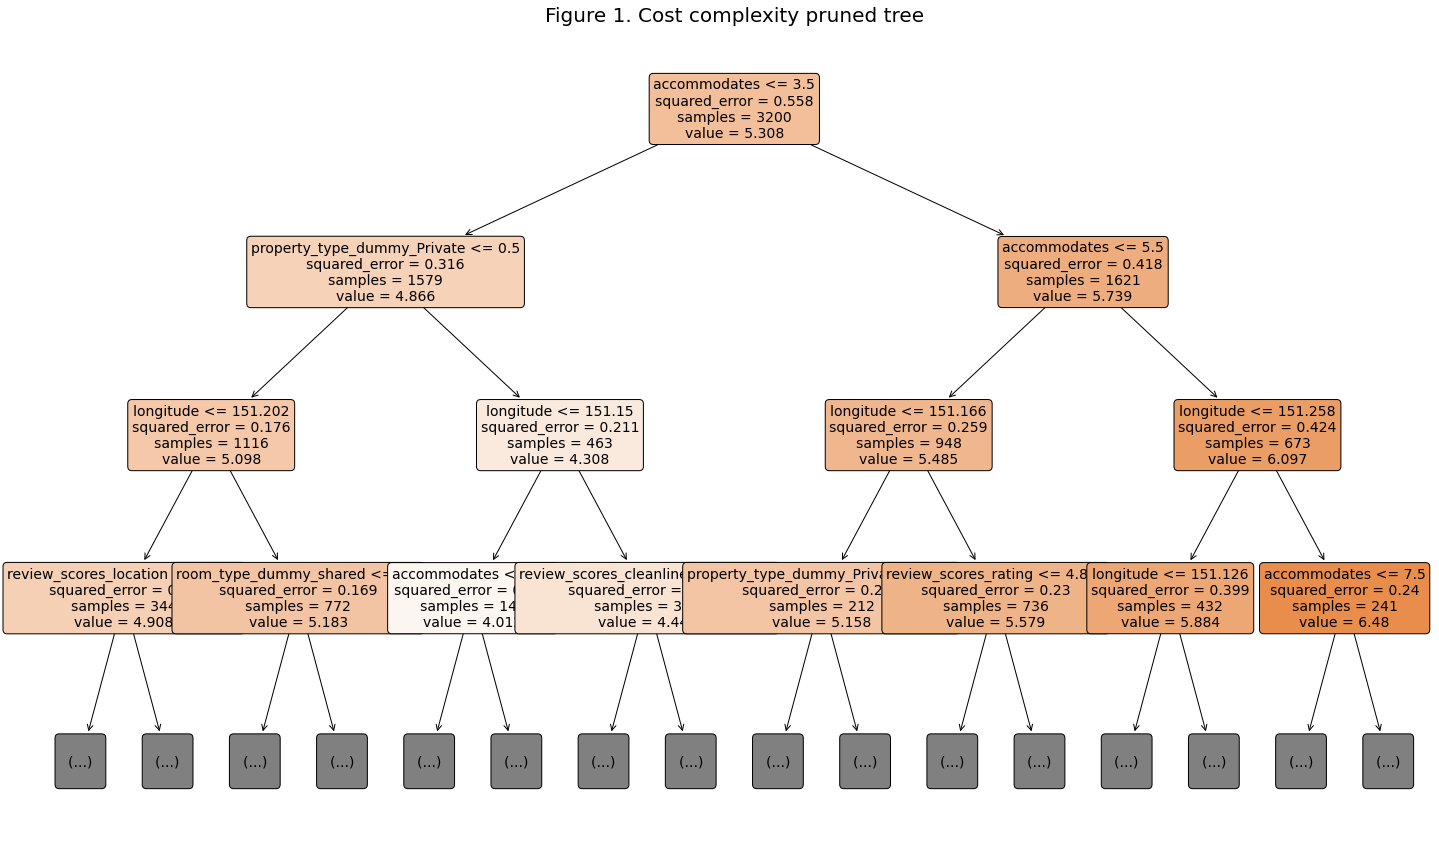

In [14]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 15))
plot_tree(tree, rounded=True, filled=True, feature_names=predictors, max_depth=3, fontsize=14)
plt.title('Figure 1. Cost complexity pruned tree', fontsize=20);

## Bagged Trees

In [15]:
from sklearn.ensemble import BaggingRegressor

bag = BaggingRegressor(DecisionTreeRegressor(), n_estimators=200, random_state=1)
bag.fit(X_train, y_train);

## Random forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=1)

tuning_parameters = {
    'min_samples_leaf': [5, 10, 20],
    'max_features': [10, 50, 100],
}

rf_cv = GridSearchCV(model, tuning_parameters, cv=5, return_train_score=False, n_jobs=4)
rf_cv.fit(X_train, y_train)
rf = rf_cv.best_estimator_

rf_cv.best_params_

{'max_features': 50, 'min_samples_leaf': 5}

In [17]:
rf.n_estimators = 200
rf.fit(X_train, y_train);

## Gradient boost

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=2000, subsample=0.5)
gb.fit(X_train, y_train);

In [19]:
len(predictors)

157

In [20]:
len(gb.feature_importances_)

157

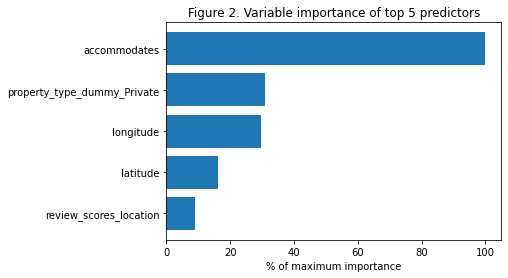

In [21]:
p = 5

importance = 100*(gb.feature_importances_/np.max(gb.feature_importances_))
feature_importance = pd.Series(importance, index=predictors).sort_values(ascending=True)

plt.barh(np.arange(p), feature_importance[-p:])
plt.yticks(np.arange(p), feature_importance[-p:].index)
plt.xlabel('% of maximum importance')
plt.title('Figure 2. Variable importance of top {} predictors'.format(p));

## Addictive boosting
boost a lasso regression with a random forest model, and a Gradient Boost model

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5)
lasso.fit(X_train_scaled, y_train);

In [23]:
y_fit = lasso.predict(X_train_scaled)
resid = y_train - y_fit

### a. random forest boost

In [24]:
rf_boost = RandomForestRegressor(n_estimators=2000, min_samples_leaf=1, max_features=150, random_state=1, n_jobs=4)
rf_boost.fit(X_train, resid);

In [25]:
y_pred = lasso.predict(X_test_scaled) + rf_boost.predict(X_test)

### b. gradient boost boost

In [26]:
gb_boost = GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=2000, subsample=0.5)
gb_boost.fit(X_train, resid);

In [27]:
y_pred = lasso.predict(X_test_scaled) + gb_boost.predict(X_test)

## Model evaluation

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
methods = {
    #'OLS': ols,
    'Lasso': lasso,
    #'Ridge': ridge,
    #'Elastic Net': elastic_net,
    'Tree': tree,
    'Bagged Trees': bag,
    'Random Forest': rf,
    'Gradient Boost': gb,
    #'Model Stack': stack,
    'Random Forest Boost': rf_boost,
    'Gradient Boost Boost': gb_boost
}

test = pd.DataFrame(columns=['RMSE', 'R2'])

for name, model in methods.items():
    if name in ['Lasso', 'Ridge', 'Elastic Net']:
        y_pred = model.predict(X_test_scaled)
    elif name in ['Random Forest Boost', 'Gradient Boost Boost']:
        y_pred = lasso.predict(X_test_scaled) + model.predict(X_test)
    else:
        y_pred = model.predict(X_test)
        
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    test.loc[name] = rmse, r2

test.round(4)

,RMSE,R2
Lasso,0.3889,0.7466
Tree,0.4361,0.6814
Bagged Trees,0.3746,0.7649
Random Forest,0.3756,0.7637
Gradient Boost,0.3530,0.7913
Random Forest Boost,0.3529,0.7914
Gradient Boost Boost,0.3454,0.8002


## prediction: lasso regression with gradient boost

In [30]:
# train the model again using the whole training dataset
#Lasso
X_train = combine[:4000]
X_test = combine[4000:6000]
y_train = y

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = LassoCV(cv=5)
lasso.fit(X_train_scaled, y_train);

y_fit = lasso.predict(X_train_scaled)
resid = y_train - y_fit

#gradient boost
gb_boost = GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=2000, subsample=0.5)
gb_boost.fit(X_train, resid);

y_pred = lasso.predict(X_test_scaled) + gb_boost.predict(X_test)
y_pred

array([5.6532649 , 5.79110704, 5.81590661, ..., 4.95327094, 5.77734992,
       5.12568537])

In [31]:
y_fit_gb = lasso.predict(X_train_scaled) + gb_boost.predict(X_train)
resid_gb = y_train - y_fit

In [32]:
prediction = np.exp(y_pred)*np.mean(np.exp(resid_gb))
prediction

array([307.12322376, 352.51430109, 361.36580794, ..., 152.51380089,
       347.69792526, 181.21234515])

In [71]:
submission = pd.DataFrame(prediction,columns=['price']).to_csv('Gradiant boost_submission.csv')
submission = pd.read_csv('Gradiant boost_submission.csv').drop('Unnamed: 0',axis=1)
submission

,price
0,311.922279
1,356.037008
2,371.703148
3,143.477434
4,331.135843
...,...
1995,84.089895
1996,145.234069
1997,152.466893
1998,333.021103
